#                                                   🔍  --- *** EXPLORING DATA SET *** ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("diabetes_final.csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape


(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There are no missing values, but some features contain zero values, which might indicate missing data
* Blood Pressure, Insulin, and Skin Thickness have many 0 values, suggesting the need for imputation.

In [6]:
cols_to_replace = ['BloodPressure', 'SkinThickness', 'Insulin']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)
df.isnull().sum()/len(df)*100


Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [7]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,29.0,125.0,0.0,0.232,54,1


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.386719,29.108073,140.671875,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096642,8.791221,86.383060,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### 1. Distribution of Features

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

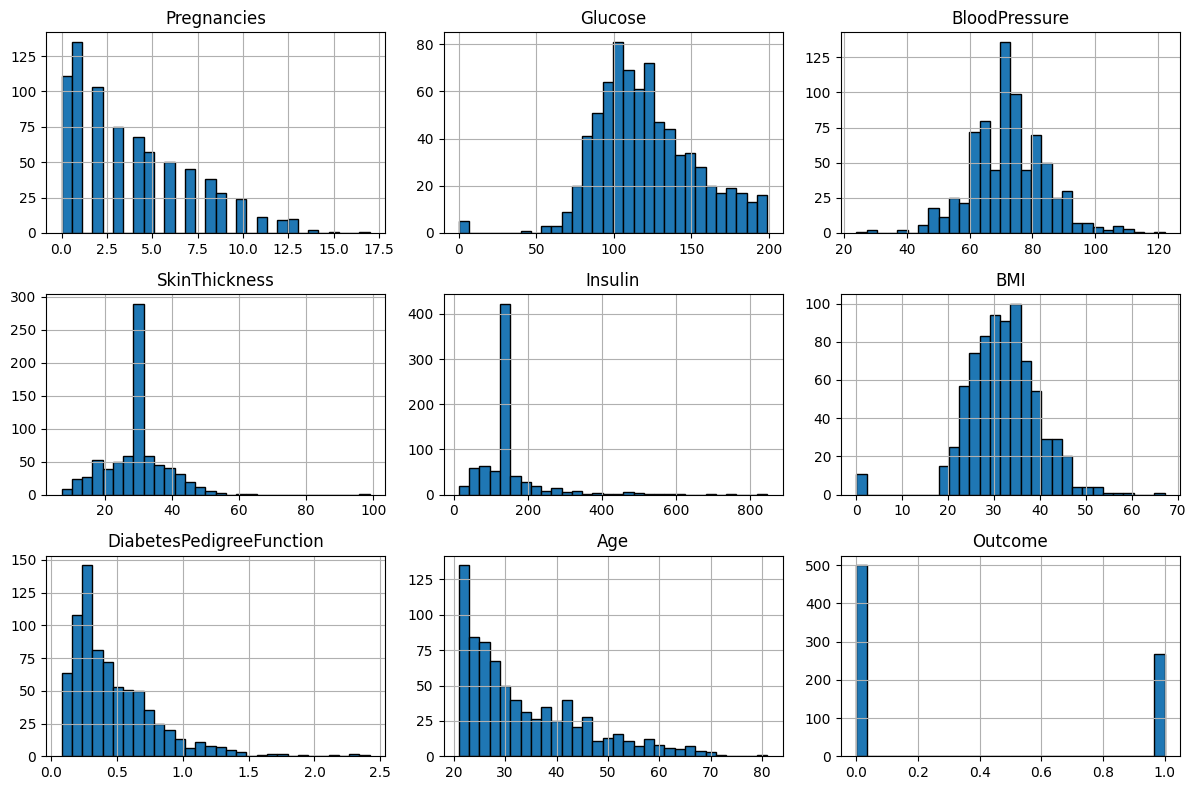

In [12]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

Most features have a right-skewed distribution, indicating the presence of extreme values.

### Insulin Vs Glucose Correlation

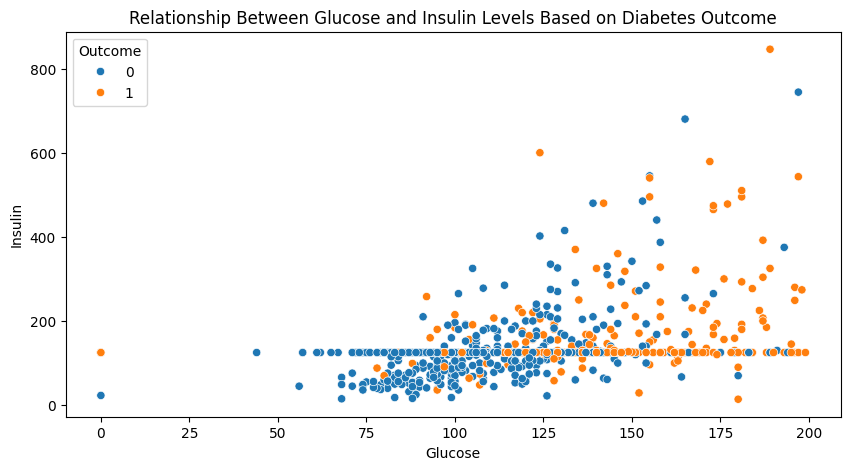

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= df ,x="Glucose" , y="Insulin" , hue="Outcome" )
plt.title("Relationship Between Glucose and Insulin Levels Based on Diabetes Outcome")
plt.show()

* A positive correlation can be observed: insulin levels also tend to rise as glucose levels increase.
* However, there are significant variations, with some individuals showing high glucose but low insulin levels.
* **Diabetes vs. Non-Diabetes Patterns**
Orange points (diabetic cases) are more concentrated in higher glucose and insulin regions.
Blue points (non-diabetic cases) are more spread across lower glucose levels, with a significant portion near the bottom (low insulin values).

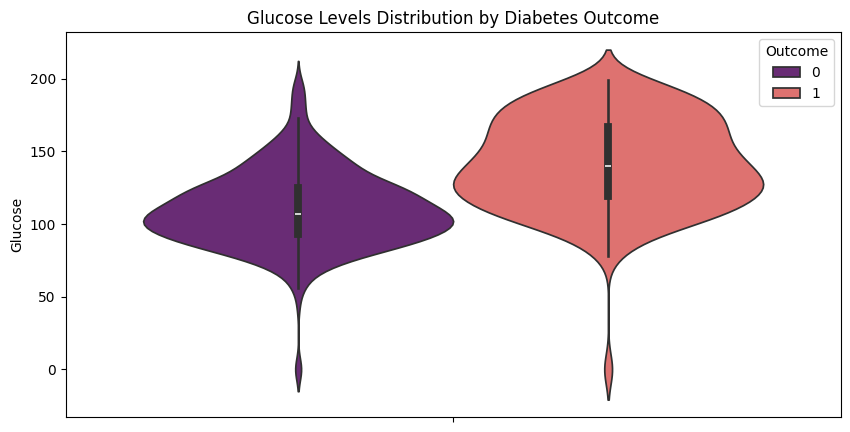

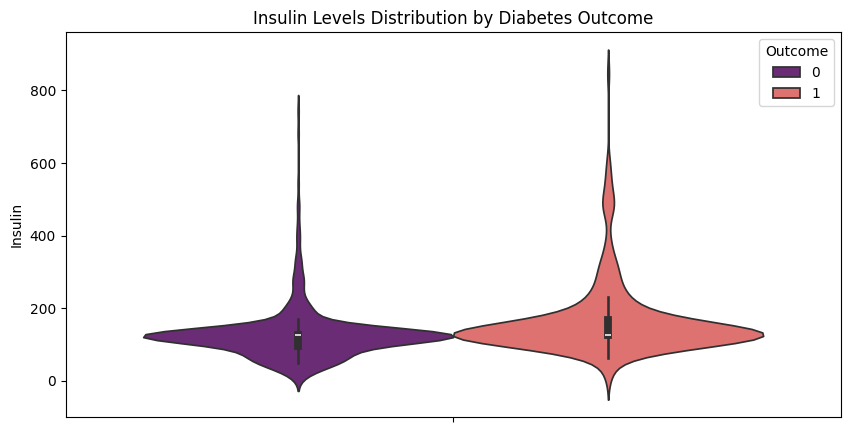

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(hue="Outcome", y="Glucose", data=df, palette="magma")
plt.title("Glucose Levels Distribution by Diabetes Outcome")
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(hue="Outcome", y="Insulin", data=df, palette="magma")
plt.title("Insulin Levels Distribution by Diabetes Outcome")
plt.show()


* **Glucose Levels (Top Violin Plot)**

Individuals with diabetes (orange) generally have higher and more variable glucose levels than non-diabetics (puple), whose levels are more concentrated around 100.

* **Insulin Levels (Bottom Violin Plot)**

Insulin levels are widely distributed in both groups, with some outliers. Non-diabetic individuals generally have lower insulin levels, while diabetics have slightly higher levels.

### Relationship Between Skin Thickness and BMI

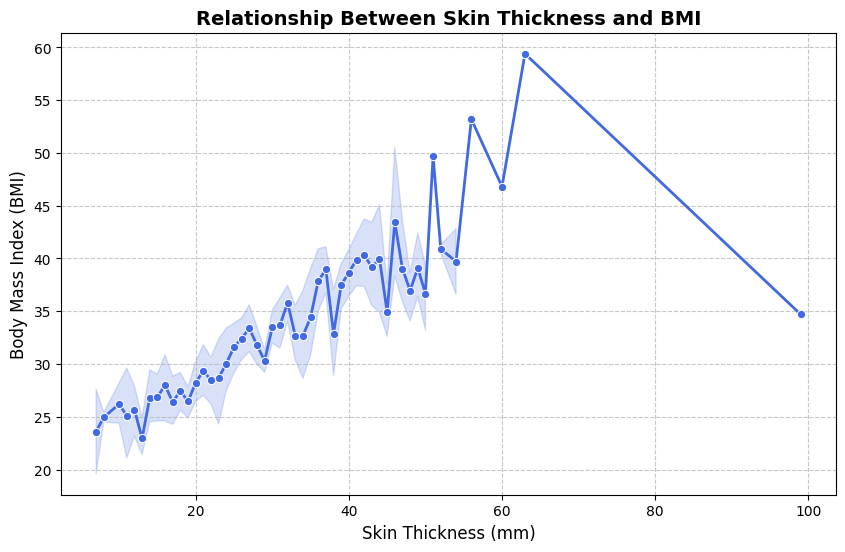

In [15]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df, x="SkinThickness", y="BMI", marker="o", color="royalblue", linewidth=2)
plt.xlabel("Skin Thickness (mm)", fontsize=12)
plt.ylabel("Body Mass Index (BMI)", fontsize=12)
plt.title("Relationship Between Skin Thickness and BMI", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



* There is a positive correlation, meaning that BMI also tends to increase as Skin Thickness increases.
* The shaded region represents the confidence interval, showing the uncertainty in the estimation.
* However, there is an unusual drop after Skin Thickness reaches around 70, which could indicate outliers or sparse data points.

### Impact of Number of Pregnancies on Diabetes Outcome

C:\Users\ABC\AppData\Local\Temp\ipykernel_1476\3638881281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Pregnancies'], y=df['Outcome'], errorbar=None, palette="viridis")


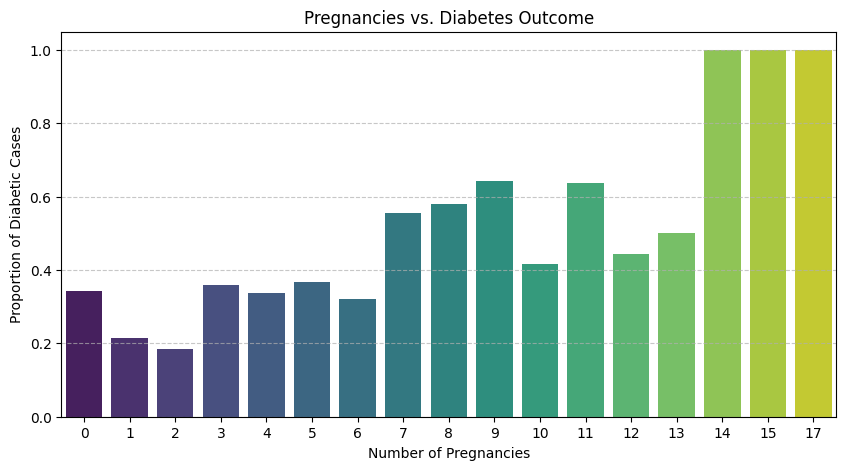

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Pregnancies'], y=df['Outcome'], errorbar=None, palette="viridis")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Proportion of Diabetic Cases")
plt.title("Pregnancies vs. Diabetes Outcome") 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* There is a positive trend, meaning that as pregnancies increase, the likelihood of diabetes also rises.

### Impact of Pregnancy Count on Age Distribution

C:\Users\ABC\AppData\Local\Temp\ipykernel_1476\1986231841.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Pregnancies'], y=df['Age'], ci=None, palette="viridis")
C:\Users\ABC\AppData\Local\Temp\ipykernel_1476\1986231841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Pregnancies'], y=df['Age'], ci=None, palette="viridis")


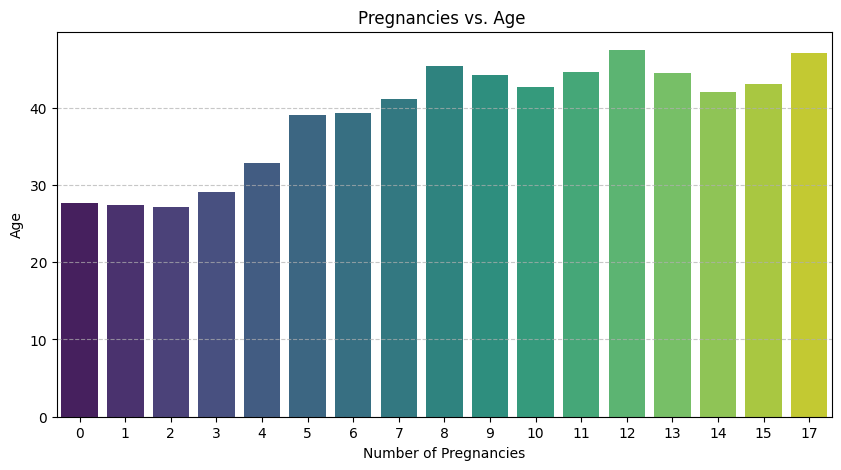

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Pregnancies'], y=df['Age'], ci=None, palette="viridis")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Age")
plt.title("Pregnancies vs. Age ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* The bar heights suggest that as the number of pregnancies increases, the average age of individuals tends to rise.
This indicates that older individuals are more likely to have more pregnancies.
* The last few bars (12-17 pregnancies) show a steady increase in age.
This could indicate a smaller subset of older individuals with many pregnancies.

### Pregnancy Categories and Diabetes Outcomes

In [21]:
df['Pregnancy_Category'] = pd.cut(df['Pregnancies'], bins=[0, 2, 5, 20], labels=['Low', 'Moderate', 'High'])


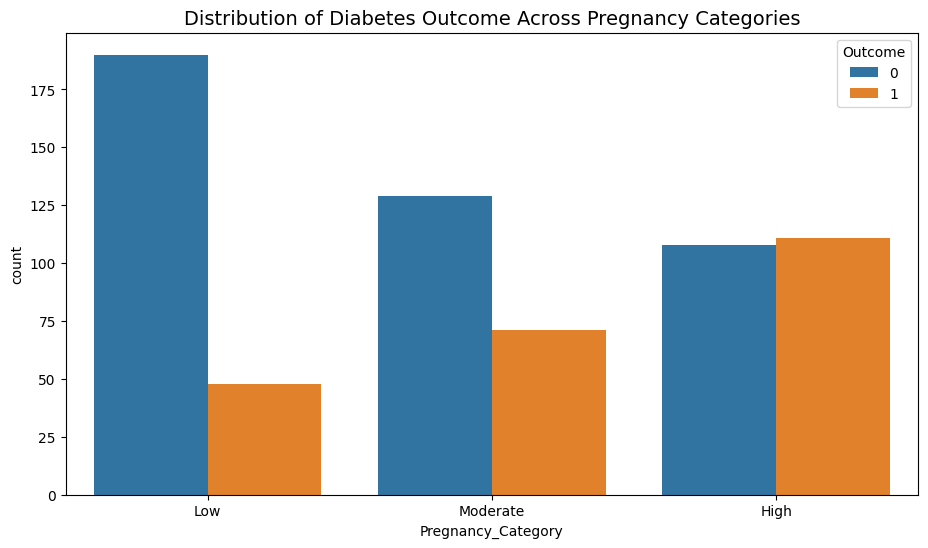

In [22]:
plt.figure(figsize=(11,6))
barplot= sns.countplot(data = df,x="Pregnancy_Category",hue="Outcome")
plt.title("Distribution of Diabetes Outcome Across Pregnancy Categories", fontsize=14)
plt.show()

Diabetes Prevalence in Different Categories:

* In the Low pregnancy category, non-diabetic cases are significantly higher than diabetic cases.
* In the Moderate category, the number of diabetic cases increases, but non-diabetic cases still dominate.
* In the High pregnancy category, the number of diabetic cases is almost equal to non-diabetic cases, indicating a higher diabetes risk with increased pregnancies.

- The trend suggests that women with higher pregnancies tend to have a greater risk of diabetes, as seen in the narrowing gap between the blue and orange bars in the High category.

### Pregnancies vs. Glucose Levels by Diabetes Outcome

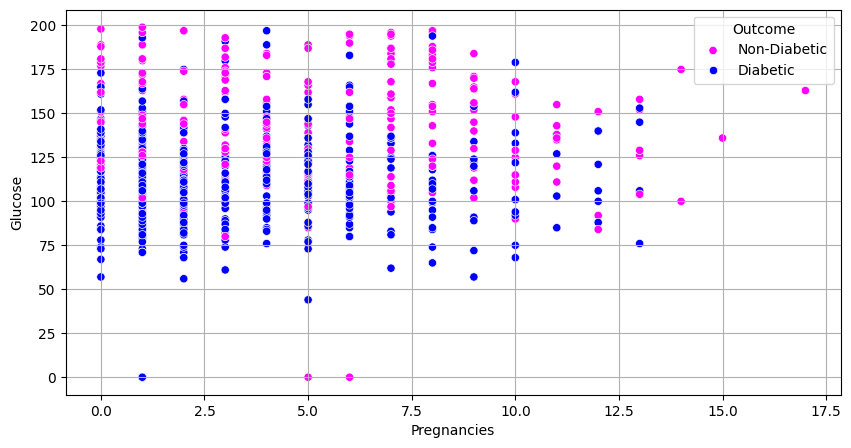

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Pregnancies'], y=df['Glucose'], hue=df['Outcome'], palette=['blue', 'fuchsia'])
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])
plt.grid(True)
plt.show()


* Higher glucose levels are more common in diabetics (pink dots).
* More pregnancies (≥5) increase the likelihood of diabetes.
* Overlap at lower pregnancies (0–3) suggests other influencing factors.
* Some non-diabetics still have high glucose, indicating additional risk factor

### DPF vs. Age by Diabetes Outcome

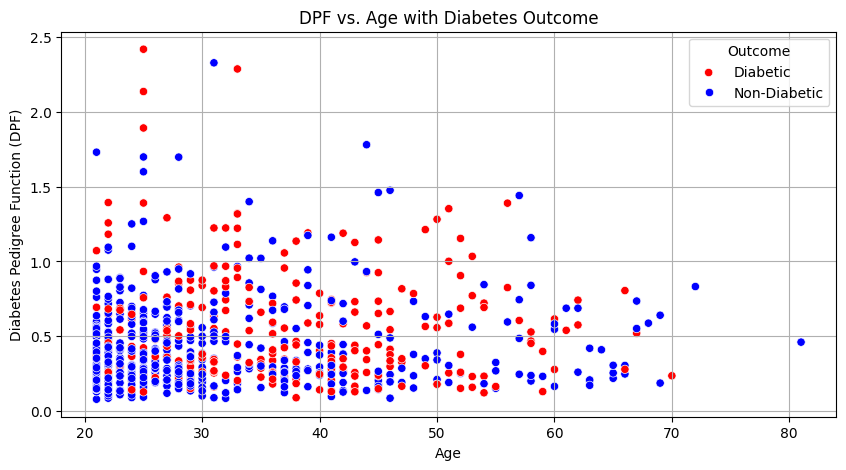

In [26]:
plt.figure(figsize=(10, 5))
palette = {0: "blue", 1: "red"}  
sns.scatterplot(x=df['Age'], y=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette=palette)
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function (DPF)")
plt.title("DPF vs. Age with Diabetes Outcome")
plt.legend(title="Outcome", labels=["Diabetic", "Non-Diabetic"])

plt.grid(True)
plt.show()


* Higher Diabetes Pedigree Function (DPF) values are seen in younger individuals.
* Diabetics (red) are more prevalent at higher DPF levels.
* Non-diabetics (blue) are widely distributed, especially at lower DPF values.
* No clear age-dependent trend, suggesting other factors influence diabetes risk.

### Correlation Heatmap

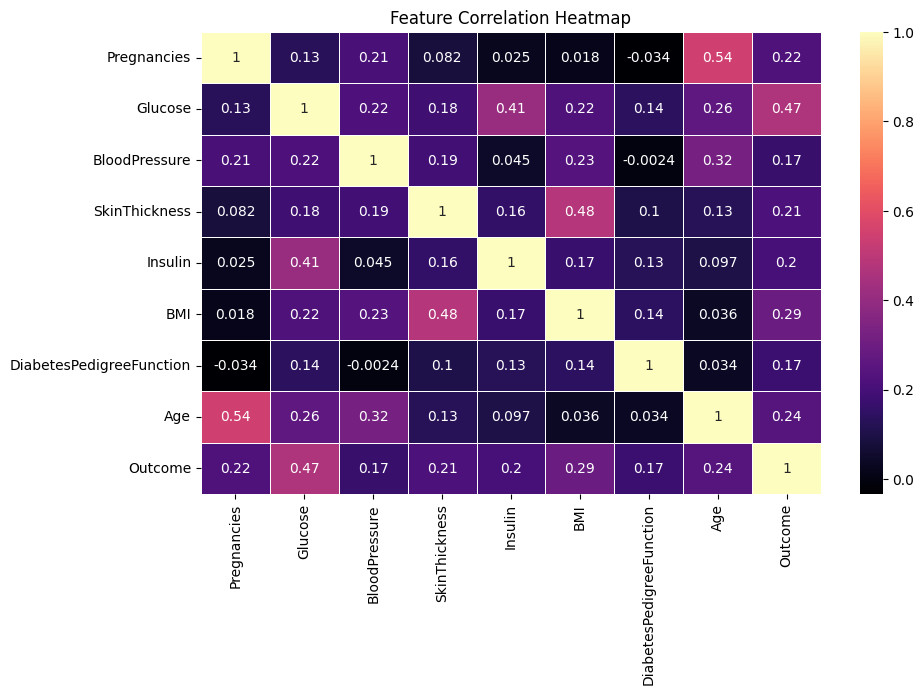

In [27]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="magma", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


* A high correlation between Glucose and Outcome suggests that high glucose levels might be a strong predictor of diabetes.
* Features like BMI and Skin Thickness might be positively correlated, meaning overweight individuals might have higher skin thickness.
* Pregnancies and age also show signs of correlation.

 ### Outcome Count (Diabetes vs. Non-Diabetes)

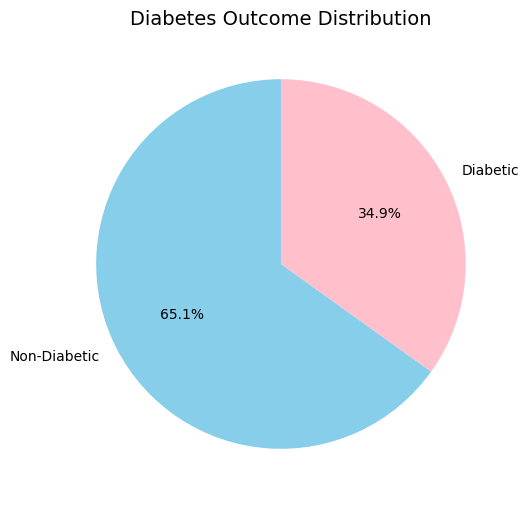

In [28]:
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'], 
                                      labels=['Non-Diabetic', 'Diabetic'], startangle=90)
plt.title('Diabetes Outcome Distribution', fontsize=14)
plt.ylabel('')
plt.show()


There are more non-diabetic patients compared to diabetic patients, indicating an imbalanced dataset.


### BMI Categories and Diabetes Outcome

In [29]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 50], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 35, 50, 80], 
                         labels=['Young', 'Middle-aged', 'Senior'])


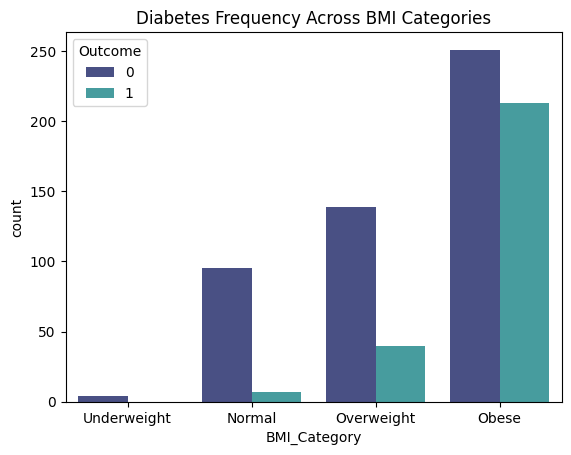

In [30]:
sns.countplot(data = df, x="BMI_Category" ,hue="Outcome",palette="mako")
plt.title("Diabetes Frequency Across BMI Categories")
plt.show()

* Higher BMI is associated with a higher risk of diabetes.
* The Obese category has the highest count of diabetic individuals.
* Overweight individuals also show a notable presence of diabetes cases.
* Few diabetic cases in the 'Underweight' and 'Normal' BMI groups.

### Diabetes Trends Across Different Age Categories

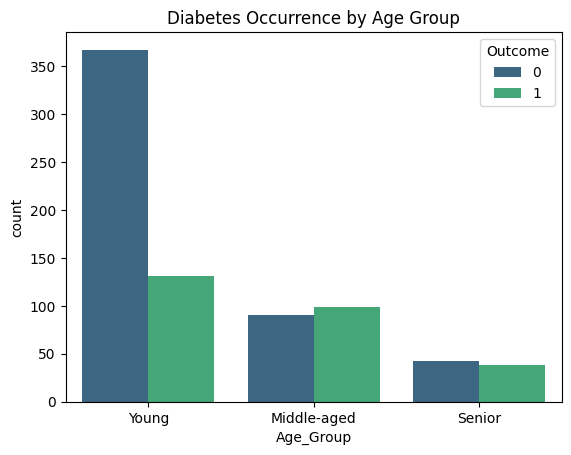

In [32]:
sns.countplot(x='Age_Group', hue='Outcome', data=df, palette="viridis")
plt.title("Diabetes Occurrence by Age Group")
plt.show()


* Young individuals have the highest number of non-diabetic cases (Outcome = 0), but some cases of diabetes are still present.
* Middle-aged individuals show a more balanced distribution between diabetic and non-diabetic cases, indicating a higher risk.
* Seniors have fewer overall cases, but the proportion of diabetics (Outcome = 1) is relatively high compared to younger groups.

### Blood Pressure Distribution Across Age Groups and Diabetes Outcomes

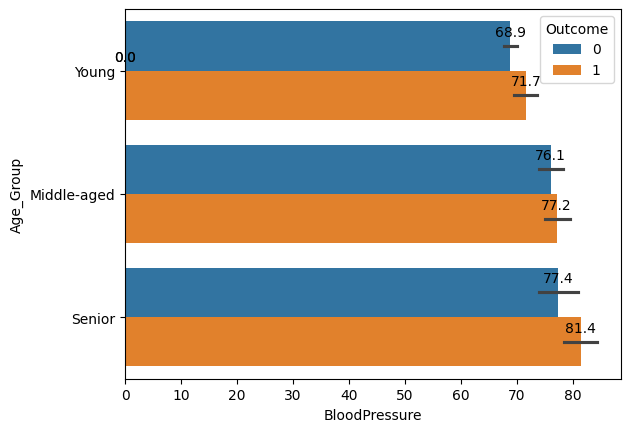

In [35]:
barplot= sns.barplot(data = df, y="Age_Group",x="BloodPressure" , hue="Outcome")
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.1f'),
                     (p.get_x() + p.get_width() ,p.get_y() + p.get_height()/2),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

plt.show()

* **Blood Pressure Trends:**

1. Blood pressure increases with age, with seniors having the highest average values.
2. The diabetic group has higher blood pressure across all age groups than the non-diabetic group

* **Age-Wise Observations:**
1. Young individuals have the lowest blood pressure, but some still have diabetes.
2. Middle-aged individuals show a balanced distribution, indicating an increased risk of diabetes with rising blood pressure.
3.  Seniors have the highest blood pressure, and a significant proportion of them are diabetic.

### Summary of All features W.R.T To Outcome

In [37]:
numeric_cols = df.select_dtypes(include=['number']).columns
summary = df.groupby('Outcome')[numeric_cols].agg(['mean', 'std'])
summary = summary.T  # Transpose to make plotting easier
summary.columns = ['Non-Diabetic', 'Diabetic']
summary.reset_index(inplace=True) 
summary.rename(columns={'level_0': 'Feature', 'level_1': 'Statistic'}, inplace=True) 

print(summary)


                     Feature Statistic  Non-Diabetic    Diabetic
0                Pregnancies      mean      3.298000    4.865672
1                Pregnancies       std      3.017185    3.741239
2                    Glucose      mean    109.980000  141.257463
3                    Glucose       std     26.141200   31.939622
4              BloodPressure      mean     70.920000   75.123134
5              BloodPressure       std     11.929385   11.951672
6              SkinThickness      mean     27.726000   31.686567
7              SkinThickness       std      8.552966    8.662994
8                    Insulin      mean    127.792000  164.701493
9                    Insulin       std     74.447469  100.932249
10                       BMI      mean     30.304200   35.142537
11                       BMI       std      7.689855    7.262967
12  DiabetesPedigreeFunction      mean      0.429734    0.550500
13  DiabetesPedigreeFunction       std      0.299085    0.372354
14                       

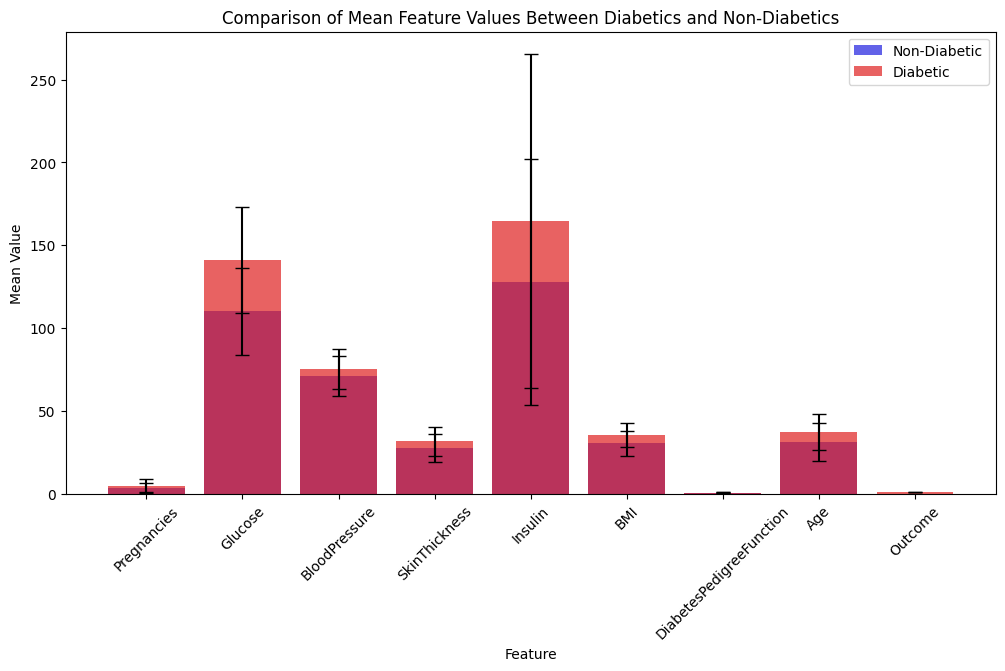

In [38]:
mean_values = summary[summary['Statistic'] == 'mean']
std_values = summary[summary['Statistic'] == 'std']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_values, x='Feature', y='Non-Diabetic', color='blue', alpha=0.7, label='Non-Diabetic')
ax = sns.barplot(data=mean_values, x='Feature', y='Diabetic', color='red', alpha=0.7, label='Diabetic')

for i in range(len(mean_values)):
    plt.errorbar(x=i, y=mean_values['Non-Diabetic'].iloc[i], yerr=std_values['Non-Diabetic'].iloc[i], fmt='none', ecolor='black', capsize=5)
    plt.errorbar(x=i, y=mean_values['Diabetic'].iloc[i], yerr=std_values['Diabetic'].iloc[i], fmt='none', ecolor='black', capsize=5)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Mean Value")
plt.title("Comparison of Mean Feature Values Between Diabetics and Non-Diabetics")
plt.legend()
plt.show()


*  **1. Glucose and Insulin Levels**

Diabetic individuals have significantly higher glucose and insulin levels on average compared to non-diabetics.
The variation (standard deviation) in insulin levels is very high, indicating a wide range of values among diabetics.

* **2.Blood Pressure and BMI:**

Blood pressure and BMI are higher in diabetics, but the difference is not as pronounced as in glucose levels.
These features may still contribute to diabetes risk but are less direct indicators compared to glucose.

* **3.Age Factor:**

Diabetics tend to be older on average, suggesting age is an important factor in diabetes risk.

* **4.Pregnancies and Diabetes Pedigree Function:**

Diabetic individuals tend to have slightly more pregnancies, which aligns with research on gestational diabetes risk.
The diabetes pedigree function, a genetic risk indicator, is also slightly higher in diabetics.

#                                                    🤖 --- *** APPLYING MACHINE LEARNING *** ---

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, precision_recall_curve)
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/content/diabetes_final (1).csv")

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [ ]:
smote = SMOTE(sampling_strategy=0.9, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

In [ ]:
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"🎯 Optimal Threshold (based on F1): {optimal_threshold:.4f}")

In [ ]:
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

In [ ]:
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred_optimal))
print("\n🌀 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))
print("📊 AUC-ROC Score:", roc_auc_score(y_test, y_pred_optimal))


In [ ]:
train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, y_pred_optimal)
print(f"\nTrain Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

if train_acc - test_acc > 0.05:
    print("⚠️ Warning: Potential Overfitting.")
elif train_acc < 0.85 and test_acc < 0.85:
    print("⚠️ Warning: Potential Underfitting.")
else:
    print("✅ Model is generalizing well.")

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
🎯 Optimal Threshold (based on F1): 0.2986

✅ Accuracy: 0.8280701754385965

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       150
           1       0.75      0.96      0.84       135

    accuracy                           0.83       285
   macro avg       0.85      0.83      0.83       285
weighted avg       0.85      0.83      0.83       285


🌀 Confusion Matrix:
 [[107  43]
 [  6 129]]
📊 AUC-ROC Score: 0.8344444444444445

Train Accuracy: 0.8722, Test Accuracy: 0.8281
✅ Model is generalizing well.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


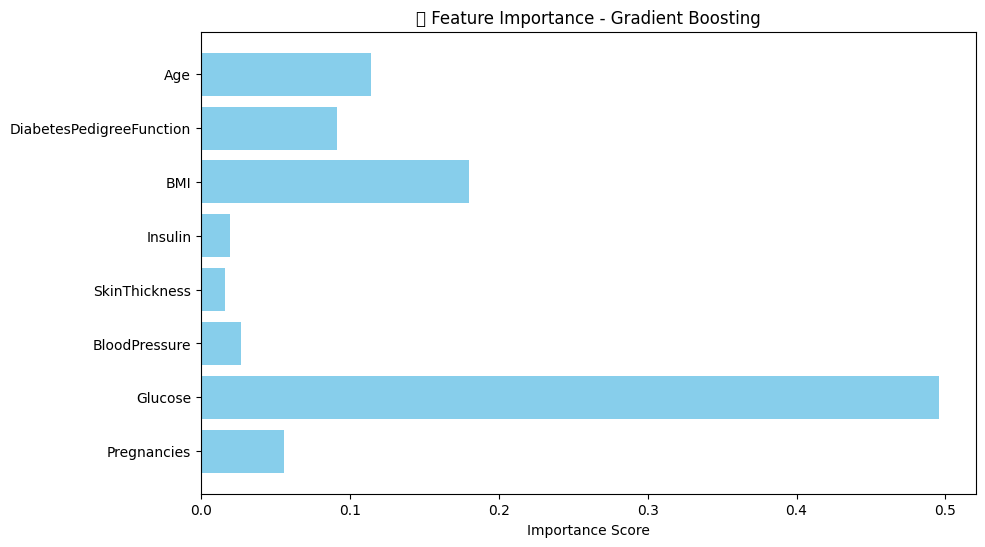

In [ ]:
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("🎯 Feature Importance - Gradient Boosting")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'diabetes_prediction_model.pkl')
print("✅ Model saved successfully as 'diabetes_prediction_model.pkl'")

✅ Model saved successfully as 'diabetes_prediction_model.pkl'


In [ ]:
import joblib 

with open('diabetes_prediction_model.pkl', 'rb') as file:
    model = joblib.load(file) # Use joblib.load() to load the model